In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from collections import defaultdict

# Data Preparation

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv('datatraining.csv', parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

C:\Users\dalla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
date,,,,,,,,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1,4,17,51,1071,0,0,0
2015-02-04 17:51:59,2,23.15,27.2675,429.5,714.00,0.004783,1,4,17,52,1072,0,1,0
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1,4,17,53,1073,0,2,0
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1,4,17,54,1074,0,3,0
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1,4,17,55,1075,0,4,0


date
2015-02-04 17:00:00    23.125556
2015-02-04 18:00:00    22.626528
2015-02-04 19:00:00    22.065055
2015-02-04 20:00:00    21.676780
2015-02-04 21:00:00    21.478931
                         ...    
2015-02-10 05:00:00    20.140960
2015-02-10 06:00:00    20.149597
2015-02-10 07:00:00    20.294727
2015-02-10 08:00:00    20.354379
2015-02-10 09:00:00    20.881556
Freq: H, Name: Temperature, Length: 137, dtype: float64

137


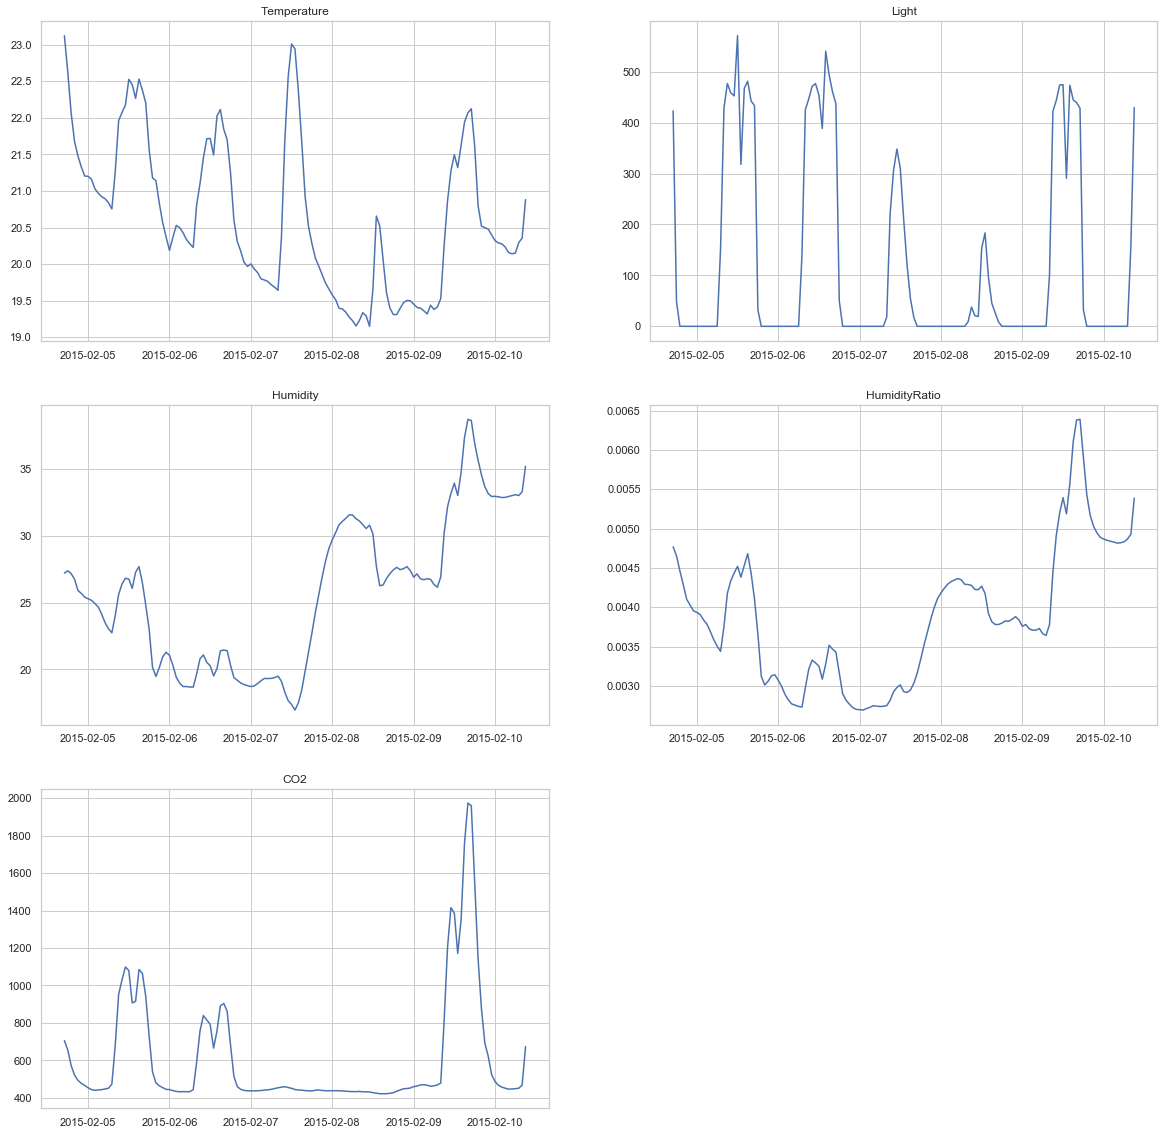

In [3]:
tsT = df['Temperature']
tsL = df['Light']
tsH = df['Humidity']
tsHR = df['HumidityRatio']
tsC = df['CO2']
figdims = (3, 2)

# resample the time series to have hourly data
tsT = tsT.resample('H').mean()
tsL = tsL.resample('H').mean()
tsHR = tsHR.resample('H').mean()
tsH = tsH.resample('H').mean()
tsC = tsC.resample('H').mean()
print(tsT, end='\n\n')
print(len(tsT))

plt.figure(figsize=(20,20))
plt.subplot2grid(figdims, (0,0))
plt.plot(tsT)
plt.title('Temperature')
plt.subplot2grid(figdims, (0,1))
plt.plot(tsL)
plt.title('Light')
plt.subplot2grid(figdims, (1,0))
plt.plot(tsH)
plt.title('Humidity')
plt.subplot2grid(figdims, (1,1))
plt.plot(tsHR)
plt.title('HumidityRatio')
plt.subplot2grid(figdims, (2,0))
plt.plot(tsC)
plt.title('CO2')
plt.show()

In [4]:
tsT.index

DatetimeIndex(['2015-02-04 17:00:00', '2015-02-04 18:00:00',
               '2015-02-04 19:00:00', '2015-02-04 20:00:00',
               '2015-02-04 21:00:00', '2015-02-04 22:00:00',
               '2015-02-04 23:00:00', '2015-02-05 00:00:00',
               '2015-02-05 01:00:00', '2015-02-05 02:00:00',
               ...
               '2015-02-10 00:00:00', '2015-02-10 01:00:00',
               '2015-02-10 02:00:00', '2015-02-10 03:00:00',
               '2015-02-10 04:00:00', '2015-02-10 05:00:00',
               '2015-02-10 06:00:00', '2015-02-10 07:00:00',
               '2015-02-10 08:00:00', '2015-02-10 09:00:00'],
              dtype='datetime64[ns]', name='date', length=137, freq='H')

In [5]:
index = pd.date_range(start='2015-02-04 17:00:00', end='2015-02-10 09:00:00', freq='H')
print(index, end = '\n\n')
print(len(index))

DatetimeIndex(['2015-02-04 17:00:00', '2015-02-04 18:00:00',
               '2015-02-04 19:00:00', '2015-02-04 20:00:00',
               '2015-02-04 21:00:00', '2015-02-04 22:00:00',
               '2015-02-04 23:00:00', '2015-02-05 00:00:00',
               '2015-02-05 01:00:00', '2015-02-05 02:00:00',
               ...
               '2015-02-10 00:00:00', '2015-02-10 01:00:00',
               '2015-02-10 02:00:00', '2015-02-10 03:00:00',
               '2015-02-10 04:00:00', '2015-02-10 05:00:00',
               '2015-02-10 06:00:00', '2015-02-10 07:00:00',
               '2015-02-10 08:00:00', '2015-02-10 09:00:00'],
              dtype='datetime64[ns]', length=137, freq='H')

137


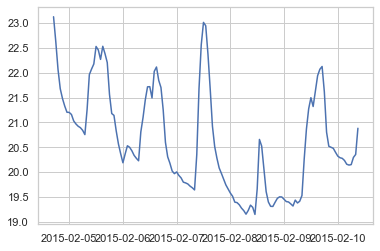

2015-02-04 17:00:00    23.125556
2015-02-04 18:00:00    22.626528
2015-02-04 19:00:00    22.065055
2015-02-04 20:00:00    21.676780
2015-02-04 21:00:00    21.478931
                         ...    
2015-02-10 05:00:00    20.140960
2015-02-10 06:00:00    20.149597
2015-02-10 07:00:00    20.294727
2015-02-10 08:00:00    20.354379
2015-02-10 09:00:00    20.881556
Freq: H, Length: 137, dtype: float64


In [6]:
tsT = pd.Series(tsT.values, index)
plt.plot(tsT)
plt.show()
print(tsT)

In [7]:
len(tsT)

137

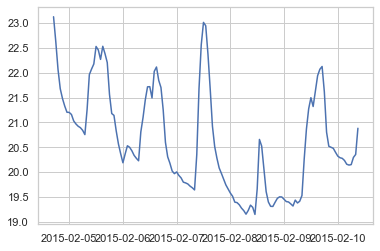

In [8]:
tsT3 = pd.Series(tsT.values, index)
plt.plot(tsT)
#plt.plot(tsT +100)
plt.show()

### Log Tranformation

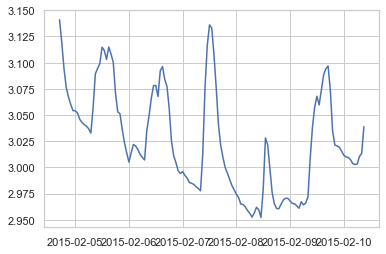

In [9]:
tsT_log = pd.Series(np.log(tsT), index=tsT.index)
plt.plot(tsT_log)
plt.show()

### Diff Tranformation

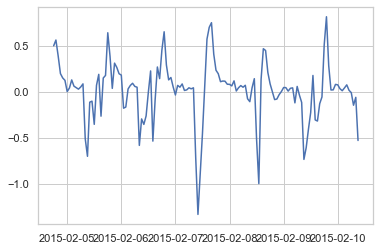

In [10]:
tsT_diff = pd.Series(tsT[:-1].values - tsT[1:].values, index=tsT.index[1:])
plt.plot(tsT_diff)
plt.show()

### Log Mean Diff Tranformation

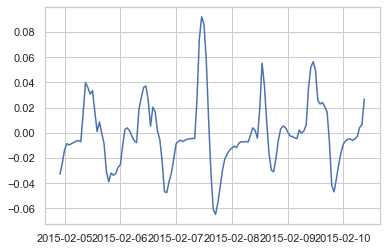

In [11]:
window = 6
tsT_log_mov_diff = pd.Series(tsT_log - tsT_log.rolling(window, center=False).mean(), index=tsT.index)
plt.plot(tsT_log_mov_diff)
plt.show()

### Autocorrelation and Partial Autocorrelation

In [12]:
from statsmodels.tsa.stattools import acf, pacf

In [13]:
len_ts = len(tsT)
len_ts

137

In [14]:
lag_acf = acf(tsT, nlags=125)
lag_pacf = pacf(tsT, nlags=125, method='ols')

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


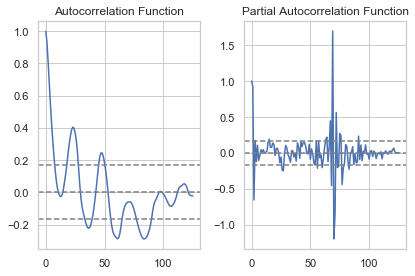

In [15]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsT)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsT)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsT)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsT)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


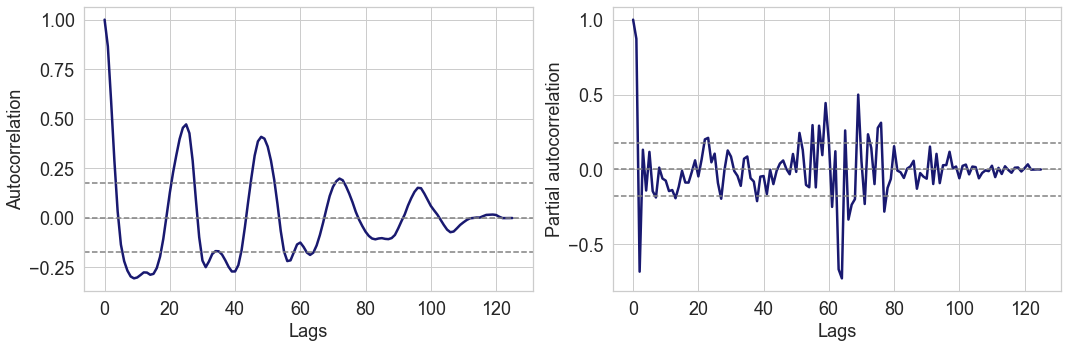

In [17]:
l =125
lag_acf = acf(tsT_log_mov_diff.values[11:], nlags=l)
lag_pacf = pacf(tsT_log_mov_diff[11:], nlags=l, method='ols')

plt.figure(figsize = (15, 5))

f = 18

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, lw = 2.5, color = 'midnightblue')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.ylabel("Autocorrelation", fontsize= f)
plt.xlabel("Lags", fontsize= f)
plt.tick_params(axis='both', which='major', labelsize=f)

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, lw = 2.5, color = 'midnightblue')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.ylabel("Partial autocorrelation", fontsize= f)
plt.xlabel("Lags", fontsize= f)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=f)
plt.tight_layout()

In [40]:
len(tsT_log_mov_diff.values[11:])

126

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1296x504 with 0 Axes>

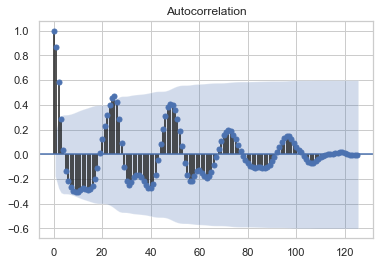

In [42]:
plt.figure(figsize=(18, 7))
plot_acf(tsT_log_mov_diff.values[11:], lags=l)
plt.show()

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


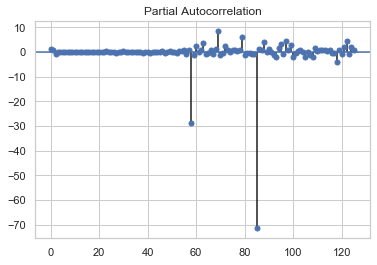

In [43]:
#plt.figure(figdims=(18, 7))
plot_pacf(tsT_log_mov_diff.values[11:], lags=l)
plt.show()

# Stationarity 

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
dftest = adfuller(tsT, autolag='AIC')

print('ResultsT of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

ResultsT of Dickey-Fuller Test:
Test Statistic                  -3.450904
p-value                          0.009341
#Lags Used                       3.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


In [46]:
dftest = adfuller(tsT_log, autolag='AIC')

print('ResultsT of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

ResultsT of Dickey-Fuller Test:
Test Statistic                  -3.403683
p-value                          0.010834
#Lags Used                       3.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


In [47]:
dftest = adfuller(tsT_log_mov_diff.values[11:], autolag='AIC')

print('ResultsT of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

ResultsT of Dickey-Fuller Test:
Test Statistic                  -4.705999
p-value                          0.000082
#Lags Used                       2.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


### Decomposition

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

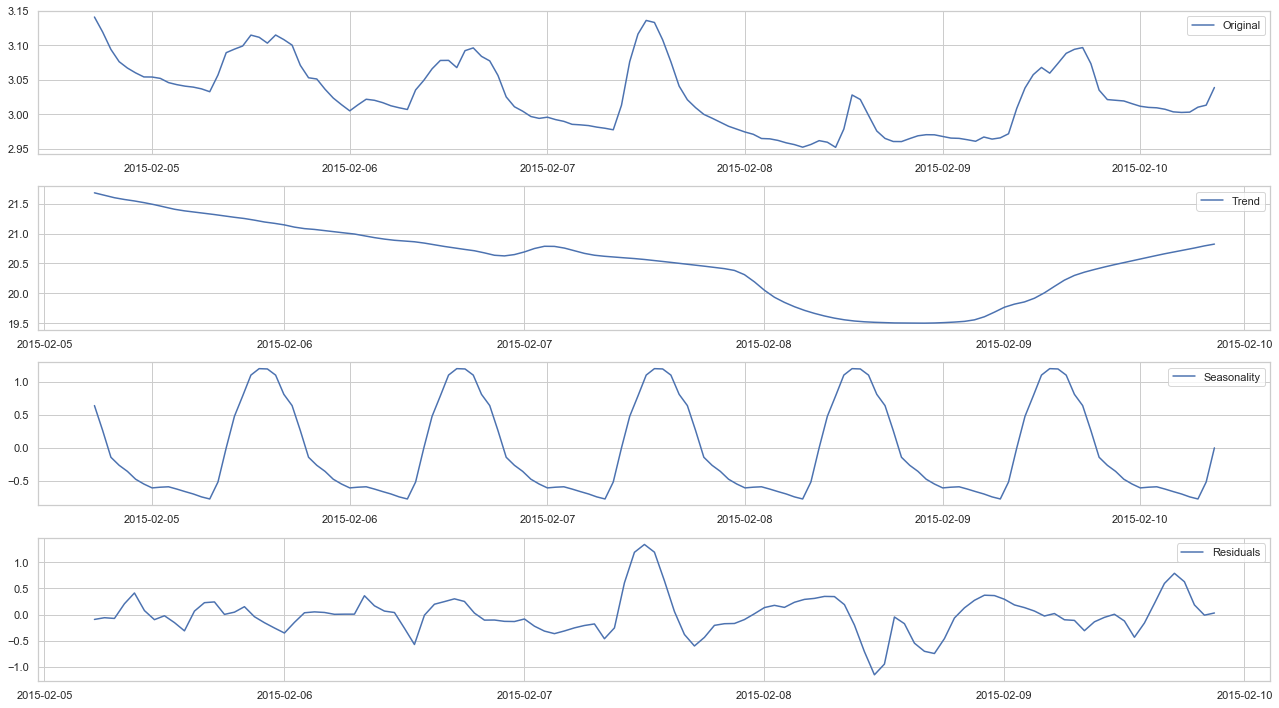

In [49]:
decomposition = seasonal_decompose(tsT)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18, 10))
plt.subplot(411)
plt.plot(tsT_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [50]:
residual.values[12:-12]

array([-0.09419089, -0.06128258, -0.07537348,  0.20597   ,  0.41198995,
        0.07515531, -0.09859834, -0.02385413, -0.15470742, -0.31259135,
        0.06485533,  0.22634991,  0.24095646,  0.00238225,  0.04488744,
        0.14968047, -0.04225336, -0.15685792, -0.25786524, -0.35409363,
       -0.15056995,  0.03330364,  0.0504368 ,  0.03911796,  0.00404764,
        0.00664523,  0.00676398,  0.35936924,  0.16647007,  0.0655971 ,
        0.03815848, -0.26257485, -0.57389852, -0.01276458,  0.19684852,
        0.24709334,  0.29990952,  0.24999143,  0.02694785, -0.10722442,
       -0.1054343 , -0.13088736, -0.13415233, -0.08559386, -0.22332151,
       -0.31730522, -0.36611474, -0.31461676, -0.25559019, -0.21018455,
       -0.18045312, -0.46368058, -0.25607789,  0.60607073,  1.19032735,
        1.34052611,  1.19286597,  0.64492802,  0.05767867, -0.38239842,
       -0.60198218, -0.43720747, -0.20759606, -0.17599367, -0.17160294,
       -0.09672099,  0.01469179,  0.1328676 ,  0.17534557,  0.13

In [51]:
dftest = adfuller(residual.values[12:-12], autolag='AIC')

print('ResultsT of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

ResultsT of Dickey-Fuller Test:
Test Statistic                  -4.828041
p-value                          0.000048
#Lags Used                       6.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


# Forecasting

In [52]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, tsT):
    mu = np.mean(tsT)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, tsT):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, tsT),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [54]:
split_index = 108
train, test = tsT_log_mov_diff.iloc[:split_index], tsT_log_mov_diff.iloc[split_index:]
#train, test = residual[12:split_index], residual[split_index:-12]
print(len(train))
print(len(test), end = '\n\n')

print("{}%".format(round(len(train)/(len(test)+len(train)), 2)*100))
print("{}%".format(round(len(test)/(len(test)+len(train)), 2)*100))

108
29

79.0%
21.0%


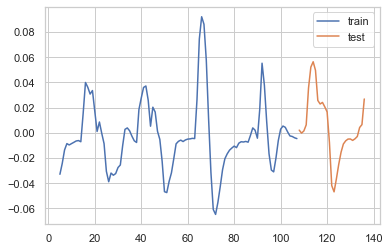

In [55]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(tsT_log_mov_diff)), test, label='test')
plt.legend()
plt.show()

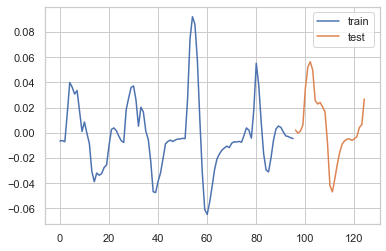

In [56]:
train, test = tsT_log_mov_diff.iloc[12:split_index], tsT_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()
#print(test[0])
#print(train[-1])

## Simple exponential smoothing

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


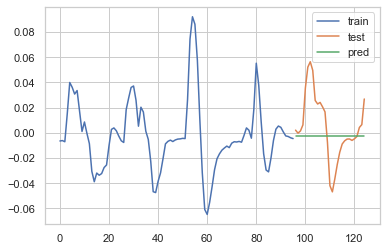

MAE 0.020
RMSE 0.026
MAD 0.013
R2 -0.024
MAPE 7.810
MAXAPE 23.398
TAPE 226.494


In [57]:
#for smoothing_level in range (1, 100):
smoothing_level=0.1 #alpha in the slides (smoothing parameter)
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])
    
#    R2 = r2_score(test, pred, tsT_log_mov_diff)
#    if R2 > -1:
#        continue
    
plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
    print('%s %.3f' % (k, v))

In [58]:
for smoothing_level in range (1, 100):
    smoothing_level=10
    ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level/10, optimized=True)
    pred = ses.predict(start=test.index[0], end=test.index[-1])
    
    R2 = r2_score(test, pred, tsT_log_mov_diff)
    if R2 > -1:
        continue
    
    plt.plot(range(len(train)), train, label='train')
    plt.plot(range(len(train), len(train)+len(test)), test, label='test')
    plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
    plt.legend()
    plt.show()

    for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
        print('%s %.3f' % (k, v))

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


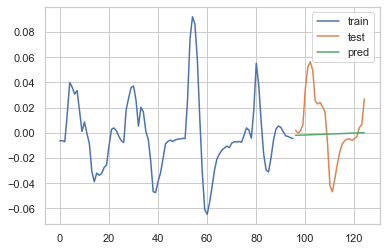

MAE 0.020
RMSE 0.026
MAD 0.015
R2 -0.011
MAPE 37.017
MAXAPE 224.333
TAPE 1073.496


In [59]:
smoothing_level=0.1
smoothing_slope=0.05
# Holt method
holt = Holt(train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
    print('%s %.3f' % (k, v))

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  Converg

seasonal periods: 24
trend, seasonal: add


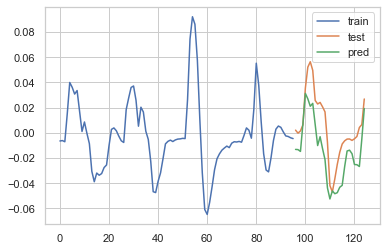

MAE 0.020
RMSE 0.022
MAD 0.020
R2 0.259
MAPE 1.317
MAXAPE 8.860
TAPE 38.189


C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


seasonal periods: 25
trend, seasonal: add


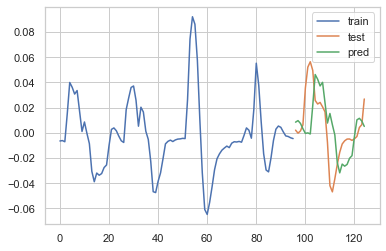

MAE 0.020
RMSE 0.026
MAD 0.016
R2 0.005
MAPE 56.449
MAXAPE 1437.084
TAPE 1637.007


C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


seasonal periods: 48
trend, seasonal: add


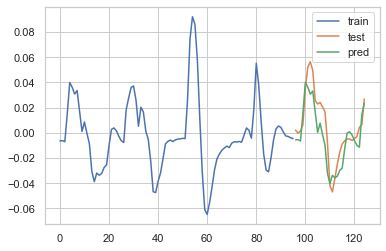

MAE 0.011
RMSE 0.014
MAD 0.009
R2 0.726
MAPE 4.687
MAXAPE 61.111
TAPE 135.935


In [60]:
#Holt-Winter's Seasonal method

for i in range(2, 49, 1):
    for j in ['add']: # se aggiungo anche 'mul' mi da errore dicendo che la ts può avere solo valori strettamente positivi
        seasonal_periods=i

        #Simple exponential smoothing: in between the average and naive method
        es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, trend=j, seasonal=j).fit()
        pred = es.predict(start=test.index[0], end=test.index[-1])
        
        R2 = r2_score(test, pred, tsT_log_mov_diff)
        if R2 <= 0:
            continue
        
        print("seasonal periods:", i)
        print("trend, seasonal:", j)
        plt.plot(range(len(train)), train, label='train')
        plt.plot(range(len(train), len(train)+len(test)), test, label='test')
        plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
        plt.legend()
        plt.show()

        for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
            print('%s %.3f' % (k, v))

C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dalla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


seasonal periods: 48
trend, seasonal: add


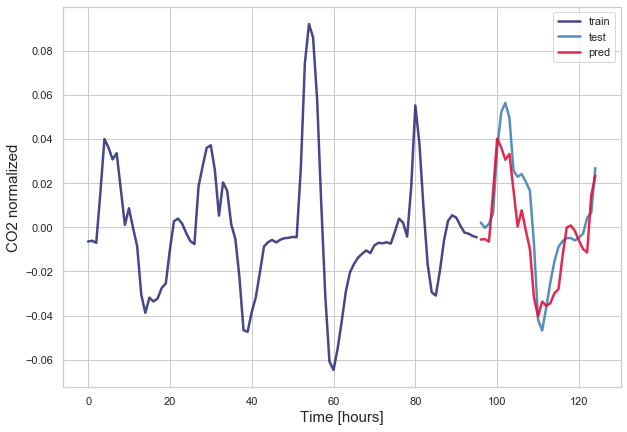

MAE 0.011
RMSE 0.014
MAD 0.009
R2 0.726
MAPE 4.687
MAXAPE 61.111
TAPE 135.935


In [74]:
#Simple exponential smoothing: in between the average and naive method
es = ExponentialSmoothing(train, seasonal_periods=48, trend='add', seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

print("seasonal periods:", i)
print("trend, seasonal:", j)
plt.figure(figsize=(10, 7))
l = 2.5
plt.plot(range(len(train)), train, label='train', lw = l, color = 'midnightblue', alpha = 0.80)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', lw = l, color = 'steelblue', alpha = 0.9)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', lw = l, color = 'crimson', alpha = 0.9)
plt.xlabel("Time [hours]", fontsize = 15)
plt.ylabel("CO2 normalized", fontsize = 15)
plt.legend()
plt.show()

for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
    print('%s %.3f' % (k, v))

0.7333167357474109

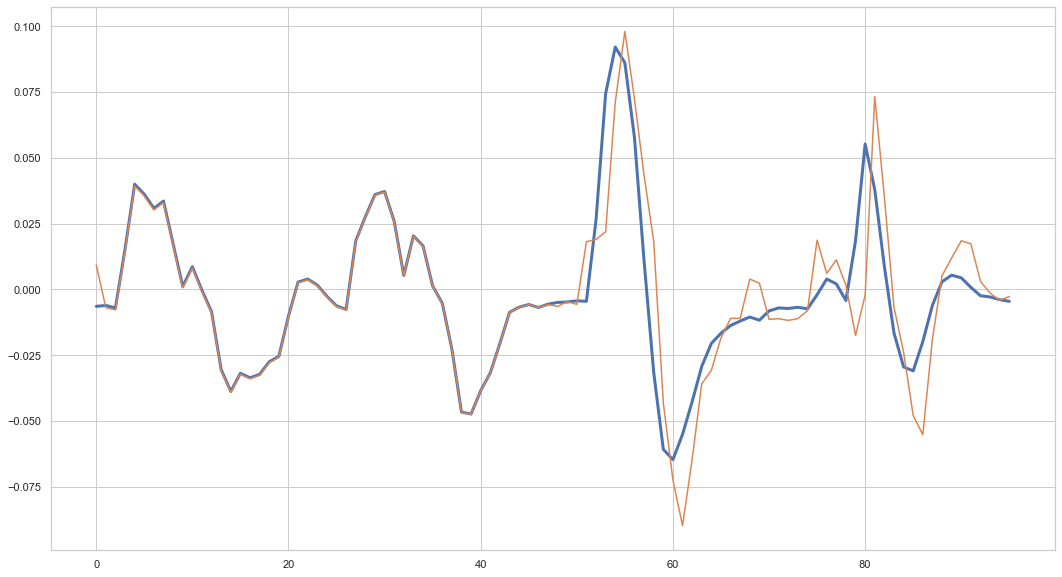

In [63]:
pred_train = es.predict(start=train.index[0], end=train.index[-1])
plt.figure(figsize=(18, 10))
plt.plot(range(len(train)), train, label='train', lw=3)
plt.plot(range(len(train)), pred_train, label='pred')
        
R2 = r2_score(train, pred_train, tsT_log_mov_diff)
R2

#cercare di capire come mai dall'inizio a circa metà la predizione è uguale ai dati del traininig, poi inizia cambiare

### Order parameters in the ARIMA model

order = (p,d,q)
- p: order of the autoregressive part
- q: degree of first differencing involved
- q: order of the moving average part

p = 7, d = 1, q = 1


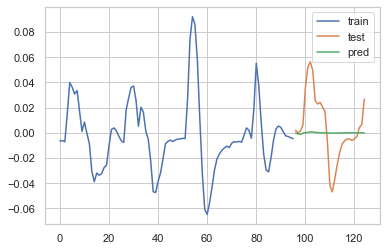

MAE 0.019
RMSE 0.026
MAD 0.015
R2 0.083
MAPE 1137.370
MAXAPE 24680.995
TAPE 32983.742


In [40]:
#BEST PERFORMANCE
p, d, q, = 7, 1, 1
arima = ARIMA(train, order=(p, d, q)).fit()
pred = arima.predict(start=test.index[0], end=test.index[-1])
                
print("p = {}, d = {}, q = {}".format(p,d,q))
plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
for k, v in evaluate(test, pred, residual).items():
    print('%s %.3f' % (k, v))

In [ ]:
# ValueError: Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
#if P == 2 or P == 4 or P == 3 or P == 1:
#    continue
p, d, q = 4, 1, 2
P, D, Q, s = 7, 1, 3, 24

sarimax = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=False)
pred = sarimax.predict(start=test.index[0], end=test.index[-1])

p = 4, d = 1, q = 2
Seasonal order: 
P = 7, D = 1, Q = 3, s = 24


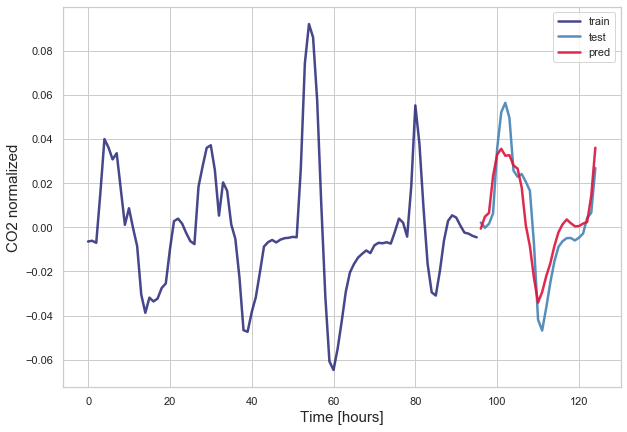

MAE 0.010
RMSE 0.012
MAD 0.008
R2 0.800
MAPE 2.804
MAXAPE 21.663
TAPE 81.328


In [73]:
#e#xcept ValueError:
#    print("ValueError with parameters:\np = {}, d = {}, q = {}".format(p, d, q))
                #    continue
print("p = {}, d = {}, q = {}".format(p, d, q))
print("Seasonal order: ")
print("P = {}, D = {}, Q = {}, s = {}".format(P,D,Q,s))
plt.figure(figsize=(10, 7))
l = 2.5
plt.plot(range(len(train)), train, label='train', color = 'midnightblue', lw=l, alpha = 0.8)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', color = 'steelblue', lw=l, alpha = 0.9)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', color = 'crimson', lw=l, alpha = 0.9)
plt.xlabel("Time [hours]", fontsize = 15)
plt.ylabel("CO2 normalized", fontsize = 15)
plt.legend()
plt.show()

for k, v in evaluate(test, pred, tsT_log_mov_diff).items():
    print('%s %.3f' % (k, v))